<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Credit-Fraud-Detection" data-toc-modified-id="Credit-Fraud-Detection-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Credit Fraud Detection</a></span><ul class="toc-item"><li><span><a href="#Import-Libraries-and-Read-File" data-toc-modified-id="Import-Libraries-and-Read-File-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import Libraries and Read File</a></span></li><li><span><a href="#Exploratory-Data-Analysis-(EDA)" data-toc-modified-id="Exploratory-Data-Analysis-(EDA)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Exploratory Data Analysis (EDA)</a></span><ul class="toc-item"><li><span><a href="#Catch-categorical-and-numerical-variables" data-toc-modified-id="Catch-categorical-and-numerical-variables-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Catch categorical and numerical variables</a></span></li><li><span><a href="#Summarize-categorical-variables" data-toc-modified-id="Summarize-categorical-variables-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Summarize categorical variables</a></span></li><li><span><a href="#Summarize-numerical-variables" data-toc-modified-id="Summarize-numerical-variables-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Summarize numerical variables</a></span></li><li><span><a href="#Analysis-of-Target-Variables" data-toc-modified-id="Analysis-of-Target-Variables-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Analysis of Target Variables</a></span></li><li><span><a href="#Correlation-Analysis" data-toc-modified-id="Correlation-Analysis-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>Correlation Analysis</a></span></li></ul></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#Outlier-Analysis" data-toc-modified-id="Outlier-Analysis-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Outlier Analysis</a></span></li><li><span><a href="#Missing-Values" data-toc-modified-id="Missing-Values-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Missing Values</a></span></li><li><span><a href="#Encodings" data-toc-modified-id="Encodings-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Encodings</a></span></li><li><span><a href="#Scaling" data-toc-modified-id="Scaling-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>Scaling</a></span></li></ul></li><li><span><a href="#Modelling" data-toc-modified-id="Modelling-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Modelling</a></span><ul class="toc-item"><li><span><a href="#Base-Model" data-toc-modified-id="Base-Model-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Base Model</a></span></li><li><span><a href="#Final-Model-and-Hyperparameter-Tuning" data-toc-modified-id="Final-Model-and-Hyperparameter-Tuning-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Final Model and Hyperparameter Tuning</a></span></li></ul></li></ul></li></ul></div>

# Credit Fraud Detection

## Import Libraries and Read File

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE

import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)

In [78]:
# import data-functions from another ipynb file
%run data-functions.ipynb

In [3]:
df_ = pd.read_csv('datasets/application_data.csv')

In [4]:
df = df_.copy()

In [5]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


## Exploratory Data Analysis (EDA)

**Unique values**

In [7]:
pd.DataFrame(df.nunique(), columns=['Unique value'])

,Unique value
SK_ID_CURR,307511
TARGET,2
NAME_CONTRACT_TYPE,2
CODE_GENDER,3
FLAG_OWN_CAR,2
FLAG_OWN_REALTY,2
CNT_CHILDREN,15
AMT_INCOME_TOTAL,2548
AMT_CREDIT,5603
AMT_ANNUITY,13672


### Catch categorical and numerical variables

In [8]:
cat_cols, num_cols, cat_but_car = grab_col_names(df, cat_th=20, car_th=20)

Observations: 307511
Variables: 122
Categorical Variables: 58
Numerical Variables: 63
Numerical But Categorical Variables: 43
Categorical But Cardinal: 1


In [9]:
cat_cols

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE',
 'TARGET',
 'CNT_CHILDREN',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_

In [10]:
num_cols

['SK_ID_CURR',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_M

In [11]:
cat_but_car

['ORGANIZATION_TYPE']

### Summarize categorical variables

                 NAME_CONTRACT_TYPE  Ratio
Cash loans                   278232  90.48
Revolving loans               29279   9.52


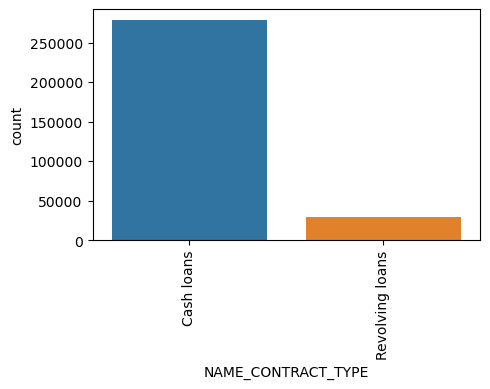

####################################################################################################


     CODE_GENDER  Ratio
F         202448  65.83
M         105059  34.16
XNA            4   0.00


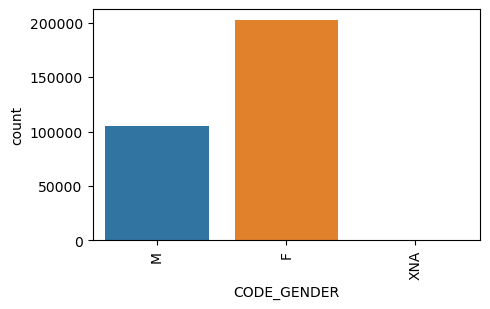

####################################################################################################


   FLAG_OWN_CAR  Ratio
N        202924  65.99
Y        104587  34.01


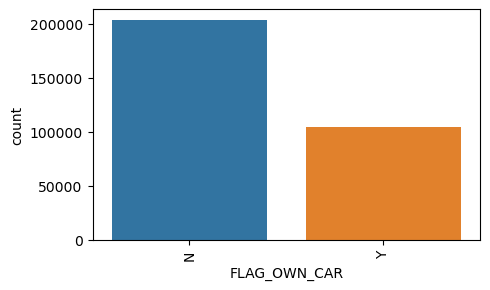

####################################################################################################


   FLAG_OWN_REALTY  Ratio
Y           213312  69.37
N            94199  30.63


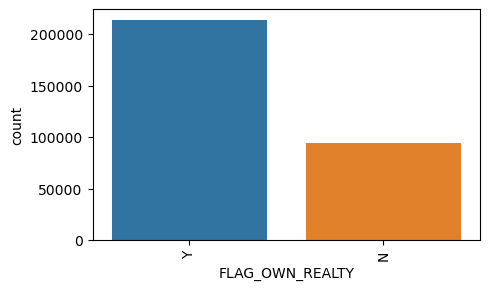

####################################################################################################


                 NAME_TYPE_SUITE  Ratio
Unaccompanied             248526  80.82
Family                     40149  13.06
Spouse, partner            11370   3.70
Children                    3267   1.06
Other_B                     1770   0.58
Other_A                      866   0.28
Group of people              271   0.09


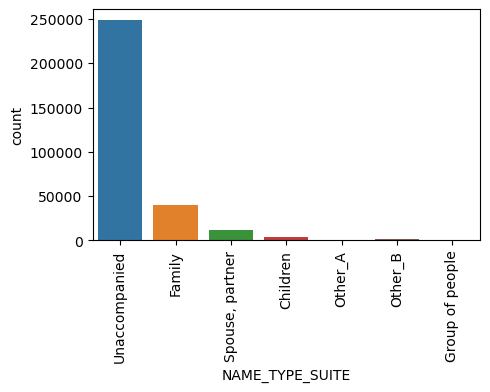

####################################################################################################


                      NAME_INCOME_TYPE  Ratio
Working                         158774  51.63
Commercial associate             71617  23.29
Pensioner                        55362  18.00
State servant                    21703   7.06
Unemployed                          22   0.01
Student                             18   0.01
Businessman                         10   0.00
Maternity leave                      5   0.00


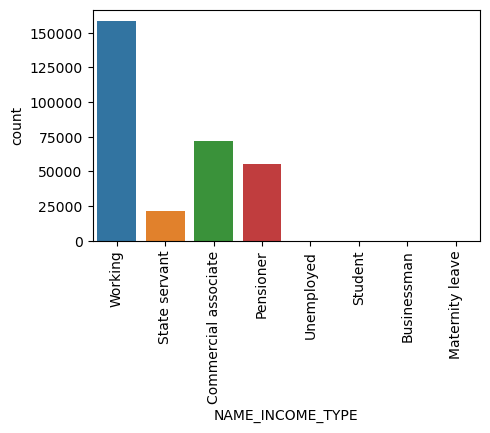

####################################################################################################


                               NAME_EDUCATION_TYPE  Ratio
Secondary / secondary special               218391  71.02
Higher education                             74863  24.34
Incomplete higher                            10277   3.34
Lower secondary                               3816   1.24
Academic degree                                164   0.05


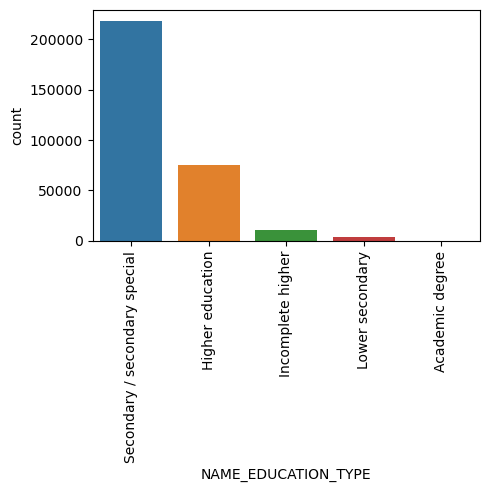

####################################################################################################


                      NAME_FAMILY_STATUS  Ratio
Married                           196432  63.88
Single / not married               45444  14.78
Civil marriage                     29775   9.68
Separated                          19770   6.43
Widow                              16088   5.23
Unknown                                2   0.00


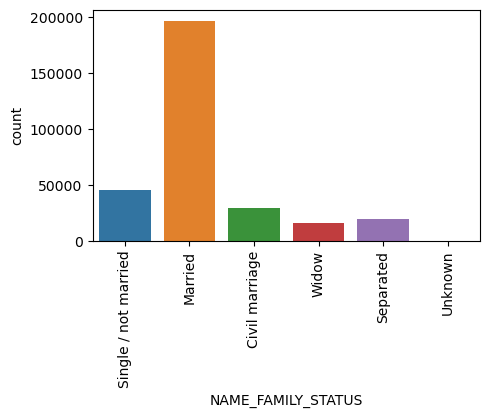

####################################################################################################


                     NAME_HOUSING_TYPE  Ratio
House / apartment               272868  88.73
With parents                     14840   4.83
Municipal apartment              11183   3.64
Rented apartment                  4881   1.59
Office apartment                  2617   0.85
Co-op apartment                   1122   0.36


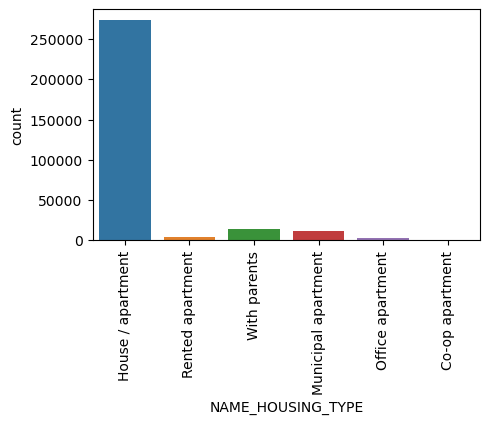

####################################################################################################


                       OCCUPATION_TYPE  Ratio
Laborers                         55186  17.95
Sales staff                      32102  10.44
Core staff                       27570   8.97
Managers                         21371   6.95
Drivers                          18603   6.05
High skill tech staff            11380   3.70
Accountants                       9813   3.19
Medicine staff                    8537   2.78
Security staff                    6721   2.19
Cooking staff                     5946   1.93
Cleaning staff                    4653   1.51
Private service staff             2652   0.86
Low-skill Laborers                2093   0.68
Waiters/barmen staff              1348   0.44
Secretaries                       1305   0.42
Realty agents                      751   0.24
HR staff                           563   0.18
IT staff                           526   0.17


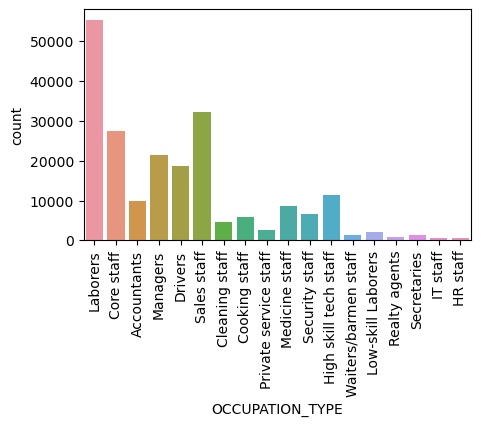

####################################################################################################


           WEEKDAY_APPR_PROCESS_START  Ratio
TUESDAY                         53901  17.53
WEDNESDAY                       51934  16.89
MONDAY                          50714  16.49
THURSDAY                        50591  16.45
FRIDAY                          50338  16.37
SATURDAY                        33852  11.01
SUNDAY                          16181   5.26


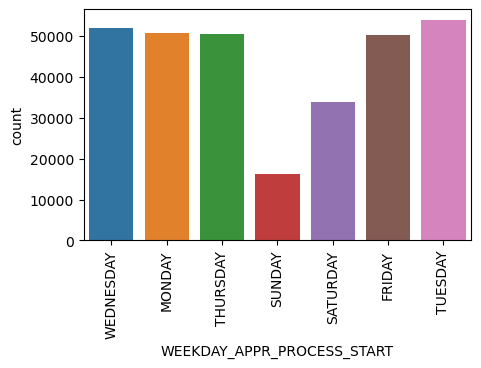

####################################################################################################


                       FONDKAPREMONT_MODE  Ratio
reg oper account                    73830  24.01
reg oper spec account               12080   3.93
not specified                        5687   1.85
org spec account                     5619   1.83


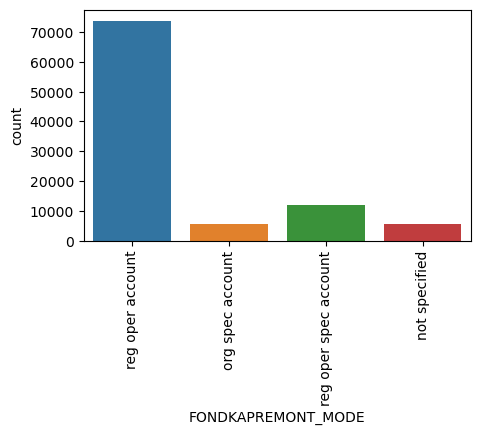

####################################################################################################


                  HOUSETYPE_MODE  Ratio
block of flats            150503  48.94
specific housing            1499   0.49
terraced house              1212   0.39


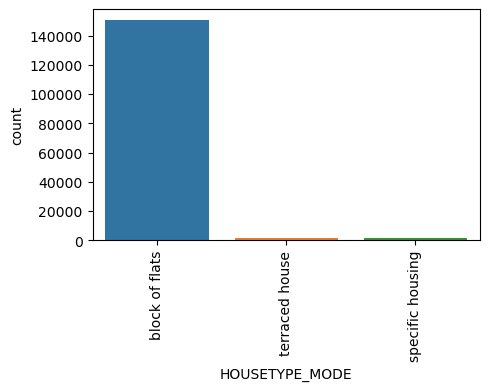

####################################################################################################


              WALLSMATERIAL_MODE  Ratio
Panel                      66040  21.48
Stone, brick               64815  21.08
Block                       9253   3.01
Wooden                      5362   1.74
Mixed                       2296   0.75
Monolithic                  1779   0.58
Others                      1625   0.53


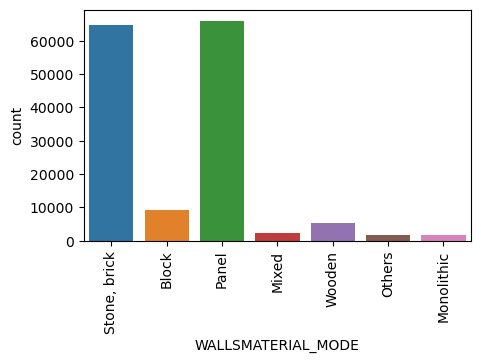

####################################################################################################


     EMERGENCYSTATE_MODE  Ratio
No                159428  51.84
Yes                 2328   0.76


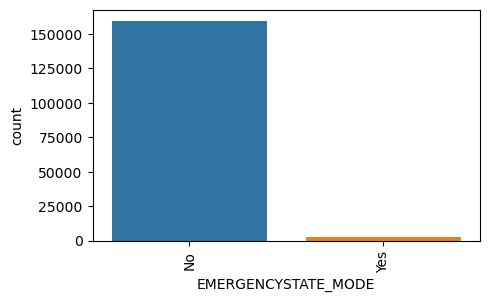

####################################################################################################


   TARGET  Ratio
0  282686  91.93
1   24825   8.07


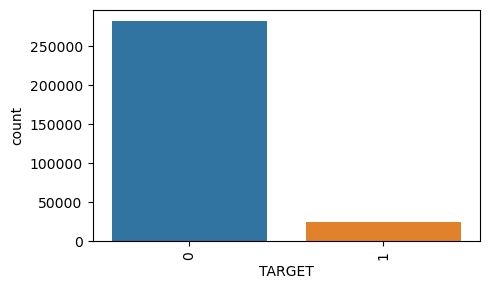

####################################################################################################


    CNT_CHILDREN  Ratio
0         215371  70.04
1          61119  19.88
2          26749   8.70
3           3717   1.21
4            429   0.14
5             84   0.03
6             21   0.01
7              7   0.00
14             3   0.00
8              2   0.00
9              2   0.00
12             2   0.00
10             2   0.00
19             2   0.00
11             1   0.00


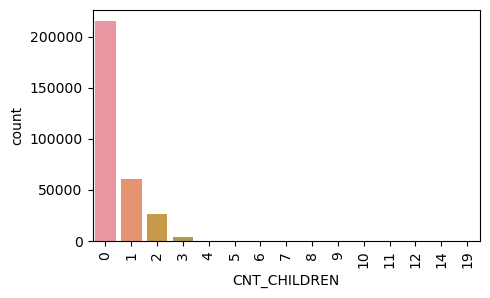

####################################################################################################


   FLAG_MOBIL  Ratio
1      307510  100.0
0           1    0.0


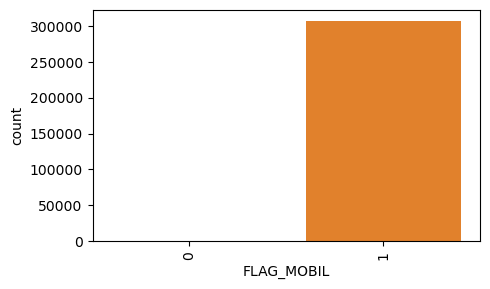

####################################################################################################


   FLAG_EMP_PHONE  Ratio
1          252125  81.99
0           55386  18.01


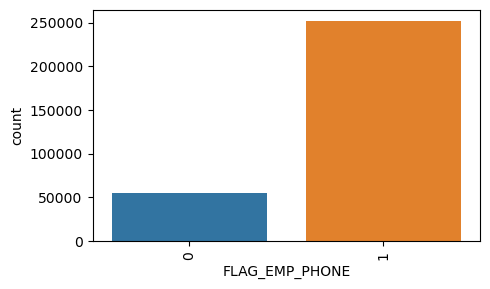

####################################################################################################


   FLAG_WORK_PHONE  Ratio
0           246203  80.06
1            61308  19.94


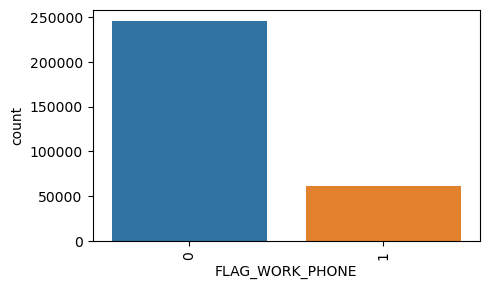

####################################################################################################


   FLAG_CONT_MOBILE  Ratio
1            306937  99.81
0               574   0.19


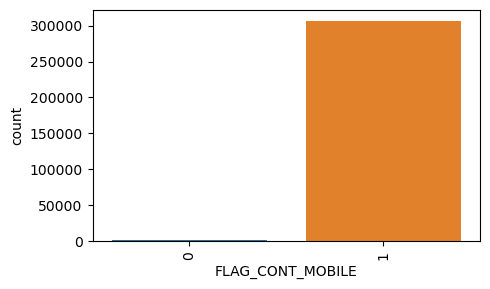

####################################################################################################


   FLAG_PHONE  Ratio
0      221080  71.89
1       86431  28.11


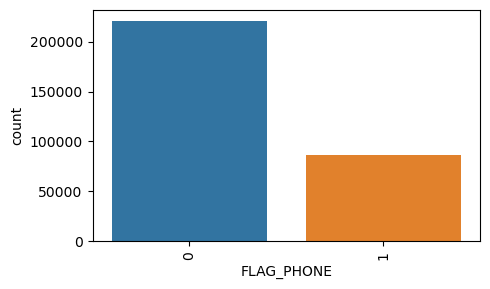

####################################################################################################


   FLAG_EMAIL  Ratio
0      290069  94.33
1       17442   5.67


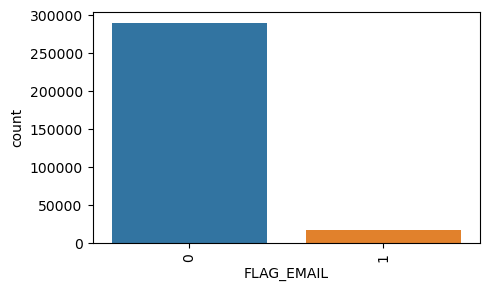

####################################################################################################


      CNT_FAM_MEMBERS  Ratio
2.0            158357  51.50
1.0             67847  22.06
3.0             52601  17.11
4.0             24697   8.03
5.0              3478   1.13
6.0               408   0.13
7.0                81   0.03
8.0                20   0.01
9.0                 6   0.00
10.0                3   0.00
14.0                2   0.00
12.0                2   0.00
20.0                2   0.00
16.0                2   0.00
13.0                1   0.00
15.0                1   0.00
11.0                1   0.00


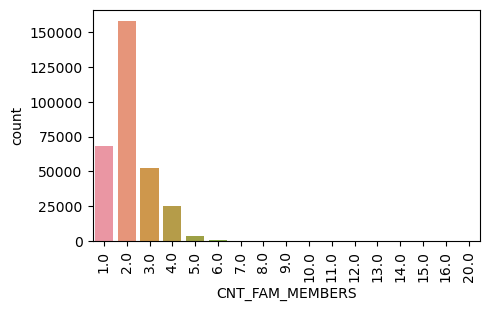

####################################################################################################


   REGION_RATING_CLIENT  Ratio
2                226984  73.81
3                 48330  15.72
1                 32197  10.47


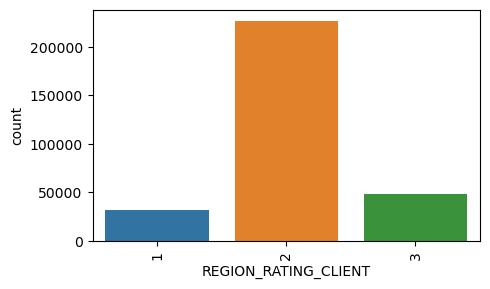

####################################################################################################


   REGION_RATING_CLIENT_W_CITY  Ratio
2                       229484  74.63
3                        43860  14.26
1                        34167  11.11


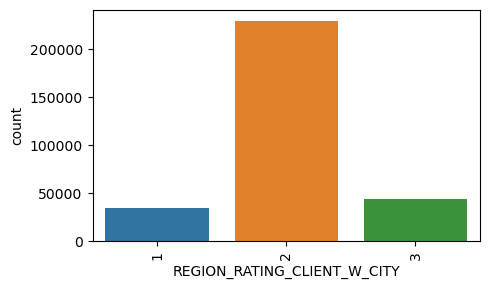

####################################################################################################


   REG_REGION_NOT_LIVE_REGION  Ratio
0                      302854  98.49
1                        4657   1.51


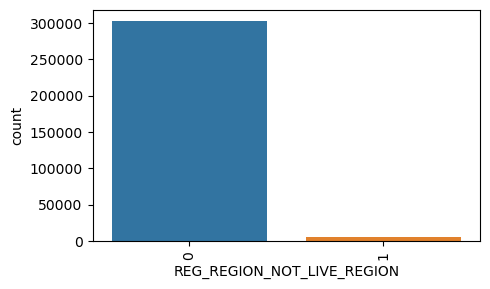

####################################################################################################


   REG_REGION_NOT_WORK_REGION  Ratio
0                      291899  94.92
1                       15612   5.08


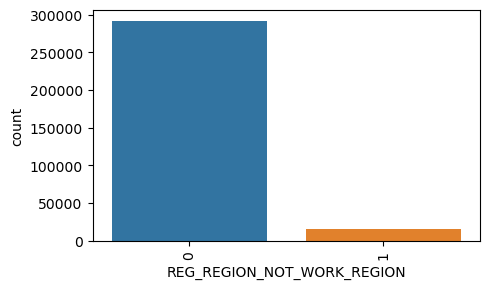

####################################################################################################


   LIVE_REGION_NOT_WORK_REGION  Ratio
0                       295008  95.93
1                        12503   4.07


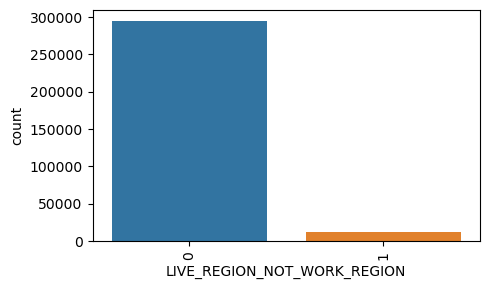

####################################################################################################


   REG_CITY_NOT_LIVE_CITY  Ratio
0                  283472  92.18
1                   24039   7.82


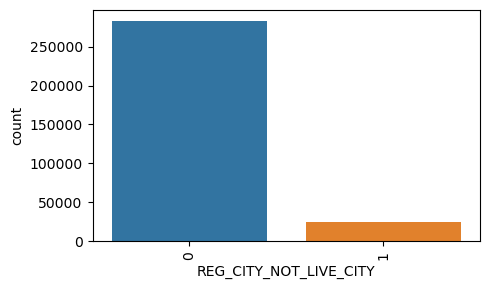

####################################################################################################


   REG_CITY_NOT_WORK_CITY  Ratio
0                  236644  76.95
1                   70867  23.05


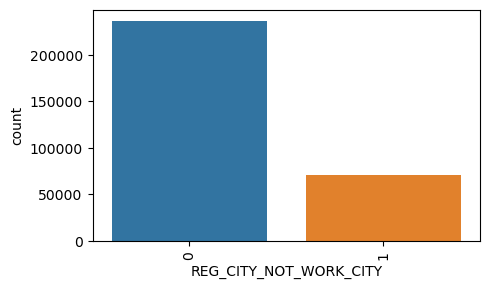

####################################################################################################


   LIVE_CITY_NOT_WORK_CITY  Ratio
0                   252296  82.04
1                    55215  17.96


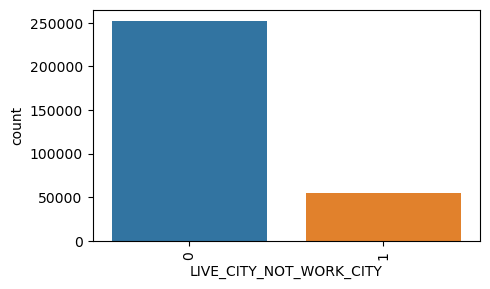

####################################################################################################


      DEF_30_CNT_SOCIAL_CIRCLE  Ratio
0.0                     271324  88.23
1.0                      28328   9.21
2.0                       5323   1.73
3.0                       1192   0.39
4.0                        253   0.08
5.0                         56   0.02
6.0                         11   0.00
7.0                          1   0.00
34.0                         1   0.00
8.0                          1   0.00


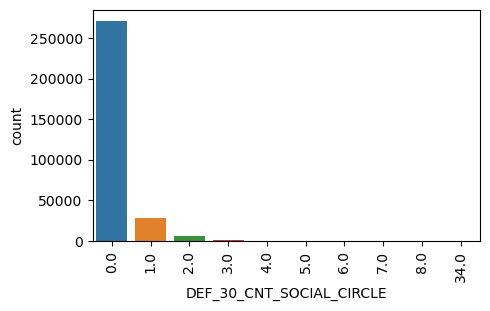

####################################################################################################


      DEF_60_CNT_SOCIAL_CIRCLE  Ratio
0.0                     280721  91.29
1.0                      21841   7.10
2.0                       3170   1.03
3.0                        598   0.19
4.0                        135   0.04
5.0                         20   0.01
6.0                          3   0.00
7.0                          1   0.00
24.0                         1   0.00


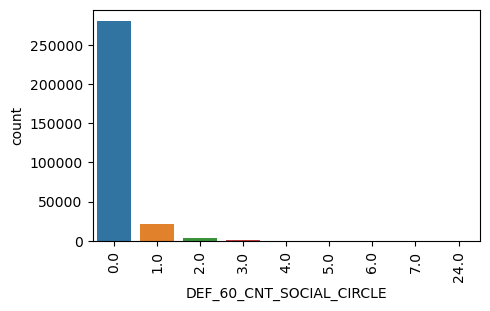

####################################################################################################


   FLAG_DOCUMENT_2  Ratio
0           307498  100.0
1               13    0.0


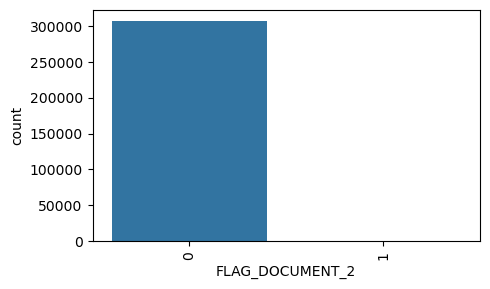

####################################################################################################


   FLAG_DOCUMENT_3  Ratio
1           218340   71.0
0            89171   29.0


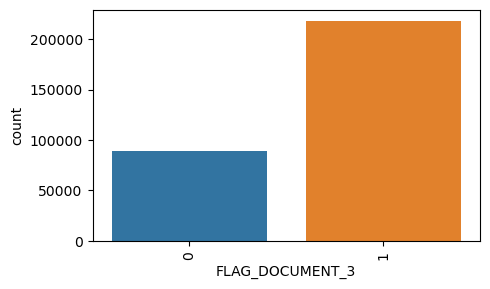

####################################################################################################


   FLAG_DOCUMENT_4  Ratio
0           307486  99.99
1               25   0.01


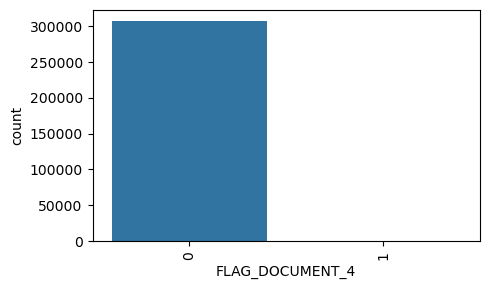

####################################################################################################


   FLAG_DOCUMENT_5  Ratio
0           302863  98.49
1             4648   1.51


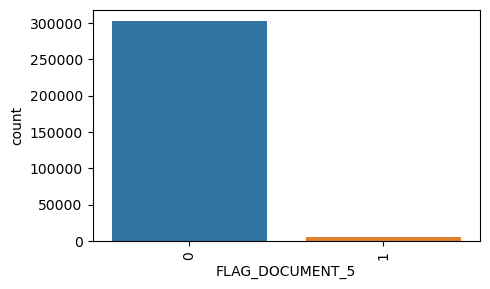

####################################################################################################


   FLAG_DOCUMENT_6  Ratio
0           280433  91.19
1            27078   8.81


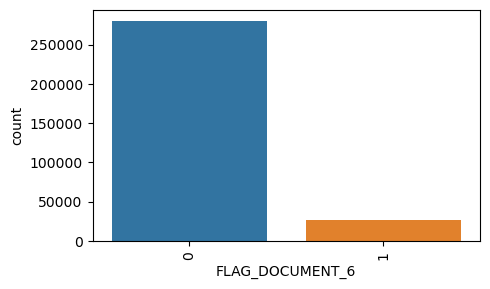

####################################################################################################


   FLAG_DOCUMENT_7  Ratio
0           307452  99.98
1               59   0.02


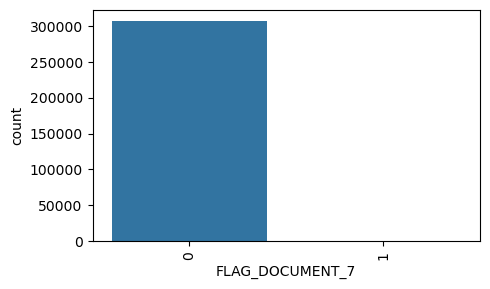

####################################################################################################


   FLAG_DOCUMENT_8  Ratio
0           282487  91.86
1            25024   8.14


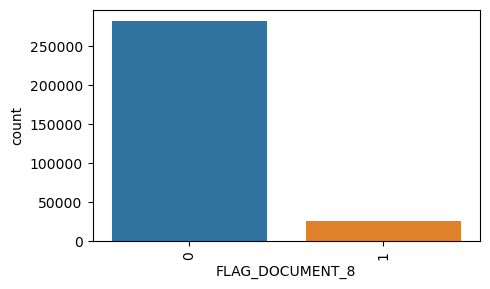

####################################################################################################


   FLAG_DOCUMENT_9  Ratio
0           306313  99.61
1             1198   0.39


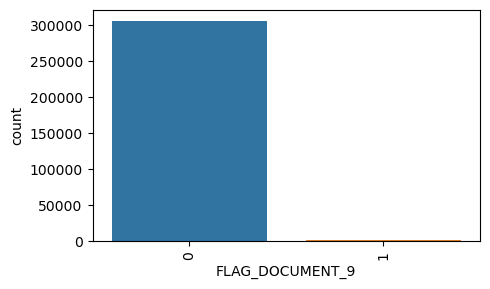

####################################################################################################


   FLAG_DOCUMENT_10  Ratio
0            307504  100.0
1                 7    0.0


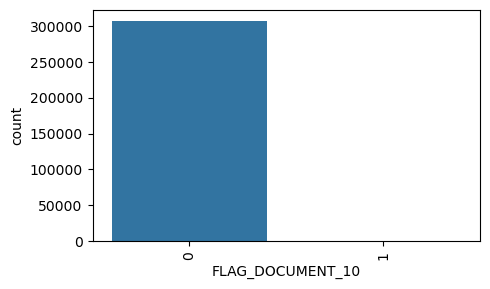

####################################################################################################


   FLAG_DOCUMENT_11  Ratio
0            306308  99.61
1              1203   0.39


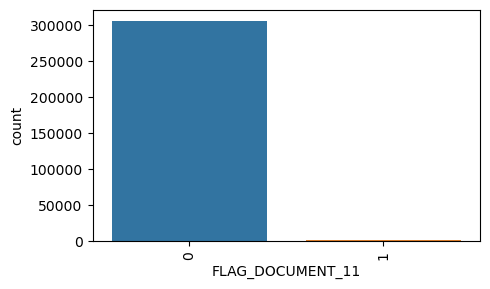

####################################################################################################


   FLAG_DOCUMENT_12  Ratio
0            307509  100.0
1                 2    0.0


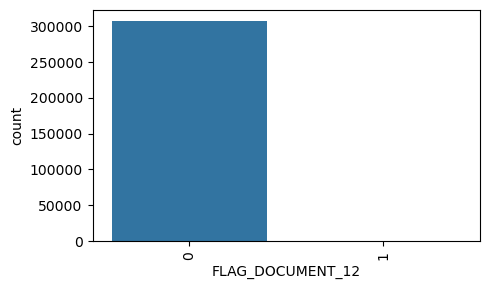

####################################################################################################


   FLAG_DOCUMENT_13  Ratio
0            306427  99.65
1              1084   0.35


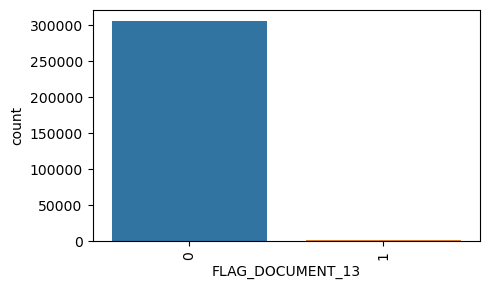

####################################################################################################


   FLAG_DOCUMENT_14  Ratio
0            306608  99.71
1               903   0.29


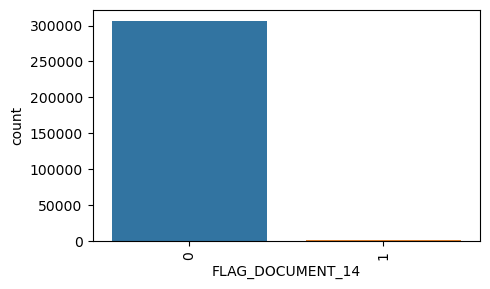

####################################################################################################


   FLAG_DOCUMENT_15  Ratio
0            307139  99.88
1               372   0.12


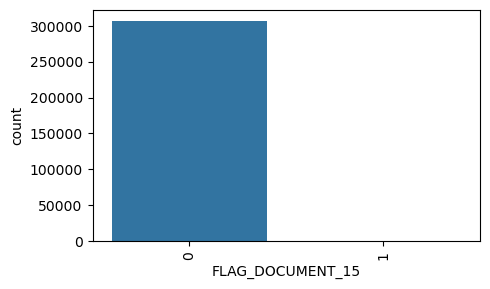

####################################################################################################


   FLAG_DOCUMENT_16  Ratio
0            304458  99.01
1              3053   0.99


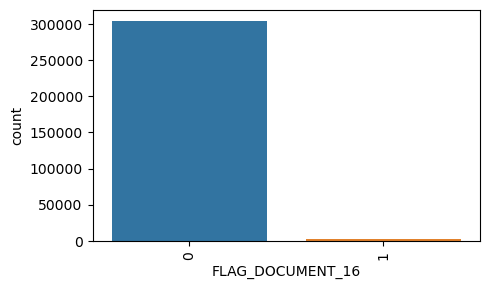

####################################################################################################


   FLAG_DOCUMENT_17  Ratio
0            307429  99.97
1                82   0.03


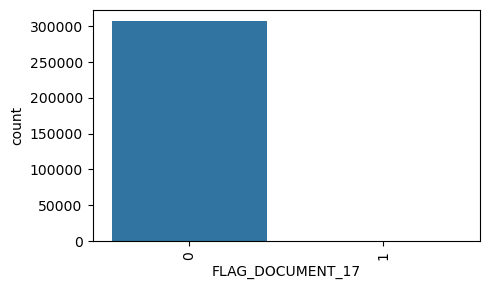

####################################################################################################


   FLAG_DOCUMENT_18  Ratio
0            305011  99.19
1              2500   0.81


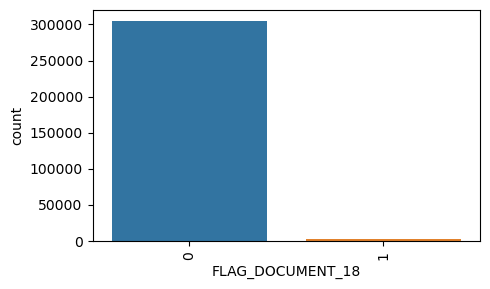

####################################################################################################


   FLAG_DOCUMENT_19  Ratio
0            307328  99.94
1               183   0.06


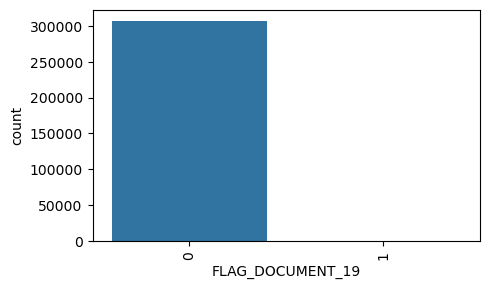

####################################################################################################


   FLAG_DOCUMENT_20  Ratio
0            307355  99.95
1               156   0.05


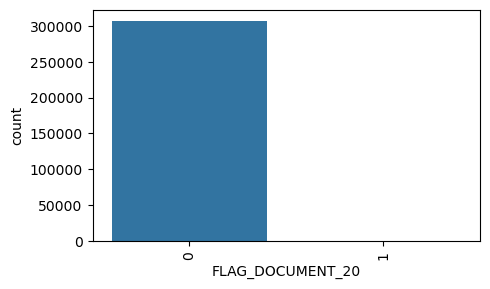

####################################################################################################


   FLAG_DOCUMENT_21  Ratio
0            307408  99.97
1               103   0.03


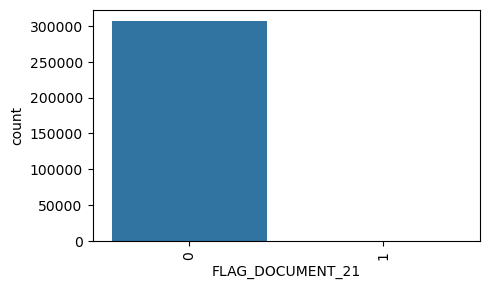

####################################################################################################


     AMT_REQ_CREDIT_BUREAU_HOUR  Ratio
0.0                      264366  85.97
1.0                        1560   0.51
2.0                          56   0.02
3.0                           9   0.00
4.0                           1   0.00


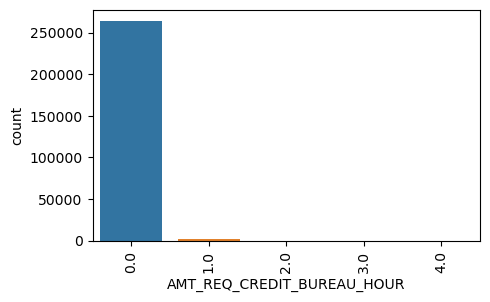

####################################################################################################


     AMT_REQ_CREDIT_BUREAU_DAY  Ratio
0.0                     264503  86.01
1.0                       1292   0.42
2.0                        106   0.03
3.0                         45   0.01
4.0                         26   0.01
5.0                          9   0.00
6.0                          8   0.00
9.0                          2   0.00
8.0                          1   0.00


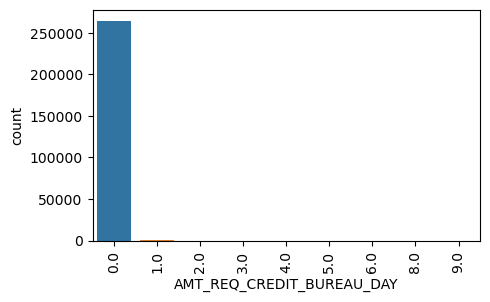

####################################################################################################


     AMT_REQ_CREDIT_BUREAU_WEEK  Ratio
0.0                      257456  83.72
1.0                        8208   2.67
2.0                         199   0.06
3.0                          58   0.02
4.0                          34   0.01
6.0                          20   0.01
5.0                          10   0.00
8.0                           5   0.00
7.0                           2   0.00


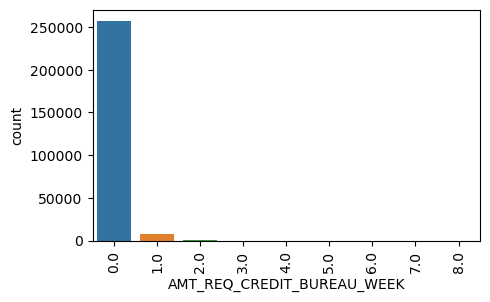

####################################################################################################


       AMT_REQ_CREDIT_BUREAU_QRT  Ratio
0.0                       215417  70.05
1.0                        33862  11.01
2.0                        14412   4.69
3.0                         1717   0.56
4.0                          476   0.15
5.0                           64   0.02
6.0                           28   0.01
8.0                            7   0.00
7.0                            7   0.00
261.0                          1   0.00
19.0                           1   0.00


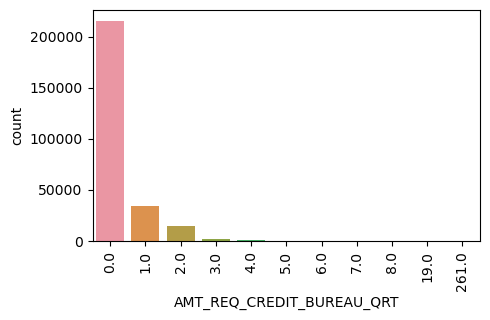

####################################################################################################




In [12]:
for col in cat_cols:
    cat_summary(df, col, plot=True)
    print('\n')

### Summarize numerical variables

In [13]:
for col in num_cols:
    num_summary(df, col, plot=False)
    print('\n')

SK_ID_CURR
count    307511.000000
mean     278180.518577
std      102790.175348
min      100002.000000
10%      135692.000000
20%      171327.000000
30%      207121.000000
40%      242626.000000
50%      278202.000000
60%      313865.000000
70%      349428.000000
80%      384696.000000
90%      420729.000000
max      456255.000000
Name: SK_ID_CURR, dtype: float64
####################################################################################################


AMT_INCOME_TOTAL
count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
10%      8.100000e+04
20%      9.900000e+04
30%      1.125000e+05
40%      1.350000e+05
50%      1.471500e+05
60%      1.620000e+05
70%      1.800000e+05
80%      2.250000e+05
90%      2.700000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64
####################################################################################################


AMT_CREDIT
count    3.075110e+05
mean     5.990260e+05
std      

count    154491.000000
mean          0.226282
std           0.144641
min           0.000000
10%           0.041700
20%           0.125000
30%           0.166700
40%           0.166700
50%           0.166700
60%           0.166700
70%           0.333300
80%           0.333300
90%           0.375000
max           1.000000
Name: FLOORSMAX_AVG, dtype: float64
####################################################################################################


FLOORSMIN_AVG
count    98869.000000
mean         0.231894
std          0.161380
min          0.000000
10%          0.041700
20%          0.041700
30%          0.166700
40%          0.208300
50%          0.208300
60%          0.208300
70%          0.333300
80%          0.375000
90%          0.416700
max          1.000000
Name: FLOORSMIN_AVG, dtype: float64
####################################################################################################


LANDAREA_AVG
count    124921.000000
mean          0.066333
std           0.081

count    137829.000000
mean          0.027022
std           0.070254
min           0.000000
10%           0.000000
20%           0.000000
30%           0.000000
40%           0.000000
50%           0.001100
60%           0.005900
70%           0.015200
80%           0.035200
90%           0.078800
max           1.000000
Name: NONLIVINGAREA_MODE, dtype: float64
####################################################################################################


APARTMENTS_MEDI
count    151450.000000
mean          0.117850
std           0.109076
min           0.000000
10%           0.016700
20%           0.041600
30%           0.062500
40%           0.074900
50%           0.086400
60%           0.104100
70%           0.128000
80%           0.166500
90%           0.242000
max           1.000000
Name: APARTMENTS_MEDI, dtype: float64
####################################################################################################


BASEMENTAREA_MEDI
count    127568.000000
mean          

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
10%           0.000000
20%           0.000000
30%           0.000000
40%           0.000000
50%           0.000000
60%           0.000000
70%           0.000000
80%           0.000000
90%           1.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64
####################################################################################################


AMT_REQ_CREDIT_BUREAU_YEAR
count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
10%           0.000000
20%           0.000000
30%           1.000000
40%           1.000000
50%           1.000000
60%           2.000000
70%           3.000000
80%           3.000000
90%           4.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64
####################################################################################################




### Analysis of Target Variables

In [14]:
for col in cat_cols:
    target_summary_with_cat(df, 'TARGET', col)

                    Target Mean
NAME_CONTRACT_TYPE             
Cash loans             0.083459
Revolving loans        0.054783
####################################################################################################
             Target Mean
CODE_GENDER             
F               0.069993
M               0.101419
XNA             0.000000
####################################################################################################
              Target Mean
FLAG_OWN_CAR             
N                0.085002
Y                0.072437
####################################################################################################
                 Target Mean
FLAG_OWN_REALTY             
N                   0.083249
Y                   0.079616
####################################################################################################
                 Target Mean
NAME_TYPE_SUITE             
Children            0.073768
Family              0.074946
Group o

                 Target Mean
FLAG_DOCUMENT_2             
0                   0.080719
1                   0.307692
####################################################################################################
                 Target Mean
FLAG_DOCUMENT_3             
0                   0.061825
1                   0.088449
####################################################################################################
                 Target Mean
FLAG_DOCUMENT_4             
0                   0.080735
1                   0.000000
####################################################################################################
                 Target Mean
FLAG_DOCUMENT_5             
0                   0.080739
1                   0.080034
####################################################################################################
                 Target Mean
FLAG_DOCUMENT_6             
0                   0.083150
1                   0.055654
################

### Correlation Analysis

In [15]:
corr_matrix = df.corr().abs()

In [16]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [17]:
upper.head(10)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,NaN,0.002108,0.001129,0.001820,0.000343,0.000433,0.000232,0.000849,0.001500,0.001366,0.000973,0.000384,0.001818,0.002804,0.001337,0.000415,0.002815,0.002753,0.000281,0.002895,0.001075,0.001138,0.000350,0.000283,0.001097,0.002903,0.001885,0.001582,0.000067,0.000082,0.002342,0.000222,0.001556,0.002070,0.001551,0.005900,0.001463,0.004862,0.002879,0.004851,0.003083,0.001465,0.003119,0.001770,0.002575,0.003042,0.001961,0.001411,0.001890,0.005245,0.001058,0.005017,0.002844,0.004386,0.002081,0.001548,0.003589,0.002156,0.001923,0.001920,0.001988,0.001647,0.001366,0.005777,0.001036,0.005067,0.002583,0.004588,0.002837,0.001699,0.003272,0.002205,0.003020,0.002440,0.002288,0.001409,0.000082,0.001423,0.001187,0.000858,0.000700,0.003411,0.004139,0.001097,0.002121,0.002694,0.001809,0.001505,0.000815,0.002012,0.001045,0.000896,0.001077,0.002604,0.000724,0.001450,0.000509,0.000167,0.001073,0.000282,0.002672,0.002193,0.002099,0.000485,0.001025,0.004659
TARGET,NaN,NaN,0.019187,0.003982,0.030369,0.012817,0.039645,0.037227,0.078239,0.044932,0.041975,0.051457,0.037612,0.000534,0.045982,0.028524,0.000370,0.023806,0.001758,0.009308,0.058899,0.060893,0.024166,0.005576,0.006942,0.002819,0.044395,0.050994,0.032518,0.155317,0.160472,0.178919,0.029498,0.022746,0.009728,0.022149,0.018550,0.034199,0.019172,0.044003,0.033614,0.010885,0.025031,0.032997,0.003176,0.013578,0.027284,0.019952,0.009036,0.022068,0.016340,0.032131,0.017387,0.043226,0.032698,0.010174,0.023393,0.030685,0.001557,0.012711,0.029184,0.022081,0.009993,0.022326,0.018573,0.033863,0.019025,0.043768,0.033394,0.011256,0.024621,0.032739,0.002757,0.013337,0.032596,0.009131,0.032248,0.009022,0.031276,0.055218,0.005417,0.044346,0.002672,0.000316,0.028602,0.001520,0.008040,0.004352,0.001414,0.004229,0.000756,0.011583,0.009464,0.006536,0.011615,0.003378,0.007952,0.001358,0.000215,0.003709,0.000930,0.002704,0.000788,0.012462,0.002022,0.019930
CNT_CHILDREN,NaN,NaN,NaN,0.012882,0.002145,0.021374,0.001827,0.025573,0.330938,0.239818,0.183395,0.028019,0.008494,0.001041,0.240714,0.055630,0.000794,0.029906,0.022619,0.

In [18]:
# highly correlated variables (greater than 0.85)
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

In [19]:
to_drop

['AMT_GOODS_PRICE',
 'FLAG_EMP_PHONE',
 'REGION_RATING_CLIENT_W_CITY',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'OBS_60_CNT_SOCIAL_CIRCLE']

**Deleting highly correlated variables**

In [20]:
df.drop(to_drop, axis=1, inplace=True)

In [21]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,0,1,1,0,Laborers,1.0,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0000,0.0000,reg oper account,block of flats,"Stone, brick",No,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,0,1,1,0,Core staff,2.0,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0039,0.0098,reg oper account,block of flats,Block,No,1.0,0.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,0,Laborers,1.0,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,0,1,0,0,Laborers,2.0,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,0,1,0,0,Core staff,1.0,2,THURSDAY,11,0,0,0,0,1,1,Religion,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


**We need to reassign variables because we deleted highly correlated variables**

In [22]:
# firstly I will delete id column
df.drop('SK_ID_CURR', axis=1, inplace=True)

In [23]:
cat_cols, num_cols, cat_but_car = grab_col_names(df, cat_th=20, car_th=20)

Observations: 307511
Variables: 86
Categorical Variables: 56
Numerical Variables: 29
Numerical But Categorical Variables: 41
Categorical But Cardinal: 1


## Feature Engineering

### Outlier Analysis 

**Our thresholds limit will be 0.95 and 0.05. Lets check numerical variables is there any outlier**

In [24]:
outliers_col = []
for col in num_cols:
    if check_outlier(df, col) == True:
        outliers_col.append(col)
        print(col)

AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
OWN_CAR_AGE
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
LANDAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
OBS_30_CNT_SOCIAL_CIRCLE
AMT_REQ_CREDIT_BUREAU_MON
AMT_REQ_CREDIT_BUREAU_YEAR


In [25]:
for col in outliers_col:
    catch_outliers(df, col)

Total outliers of AMT_INCOME_TOTAL: 646 rows
Total outliers of AMT_CREDIT: 20 rows
Total outliers of AMT_ANNUITY: 200 rows
Total outliers of OWN_CAR_AGE: 2 rows
Total outliers of APARTMENTS_AVG: 316 rows
Total outliers of BASEMENTAREA_AVG: 416 rows
Total outliers of YEARS_BEGINEXPLUATATION_AVG: 838 rows
Total outliers of YEARS_BUILD_AVG: 123 rows
Total outliers of COMMONAREA_AVG: 779 rows
Total outliers of ELEVATORS_AVG: 261 rows
Total outliers of ENTRANCES_AVG: 438 rows
Total outliers of LANDAREA_AVG: 665 rows
Total outliers of NONLIVINGAPARTMENTS_AVG: 1284 rows
Total outliers of NONLIVINGAREA_AVG: 1342 rows
Total outliers of OBS_30_CNT_SOCIAL_CIRCLE: 443 rows
Total outliers of AMT_REQ_CREDIT_BUREAU_MON: 5226 rows
Total outliers of AMT_REQ_CREDIT_BUREAU_YEAR: 23 rows


**Replace the outliers with thresholds**

In [26]:
for col in outliers_col:
    replace_thresholds(df, col)

### Missing Values

In [27]:
missing_df = missing_value_table(df).reset_index()
missing_df

,index,n_miss,ratio
0,COMMONAREA_AVG,214865,69.87
1,NONLIVINGAPARTMENTS_AVG,213514,69.43
2,FONDKAPREMONT_MODE,210295,68.39
3,FLOORSMIN_AVG,208642,67.85
4,YEARS_BUILD_AVG,204488,66.50
5,OWN_CAR_AGE,202929,65.99
6,LANDAREA_AVG,182590,59.38
7,BASEMENTAREA_AVG,179943,58.52
8,EXT_SOURCE_1,173378,56.38
9,NONLIVINGAREA_AVG,169682,55.18


**Let's delete columns that missing value's ratio greater than %45**

In [28]:
missing_list_grater = list(missing_df['index'].iloc[0:18].values)
missing_list_grater

['COMMONAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'FONDKAPREMONT_MODE',
 'FLOORSMIN_AVG',
 'YEARS_BUILD_AVG',
 'OWN_CAR_AGE',
 'LANDAREA_AVG',
 'BASEMENTAREA_AVG',
 'EXT_SOURCE_1',
 'NONLIVINGAREA_AVG',
 'ELEVATORS_AVG',
 'WALLSMATERIAL_MODE',
 'APARTMENTS_AVG',
 'ENTRANCES_AVG',
 'HOUSETYPE_MODE',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'EMERGENCYSTATE_MODE']

In [29]:
df.drop(missing_list_grater, axis=1, inplace=True)

In [30]:
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,0,1,1,0,Laborers,1.0,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,0,1,1,0,Core staff,2.0,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,0,Laborers,1.0,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,0,1,0,0,Laborers,2.0,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,0,1,0,0,Core staff,1.0,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


**Let's fill missing values that missing value's ratio smaller than %45**

In [31]:
missing_list_smaller = list(missing_df['index'].iloc[18:].values)
missing_list_smaller

['OCCUPATION_TYPE',
 'EXT_SOURCE_3',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'NAME_TYPE_SUITE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'EXT_SOURCE_2',
 'AMT_ANNUITY',
 'CNT_FAM_MEMBERS',
 'DAYS_LAST_PHONE_CHANGE']

In [32]:
# Fill missing occupation type as no occupation
df.loc[df['OCCUPATION_TYPE'].isnull(), 'OCCUPATION_TYPE'] = 'No Occupation'

In [33]:
# Fill missing EXT_SOURCE_3 as 0
df.loc[df['EXT_SOURCE_3'].isnull(), 'EXT_SOURCE_3'] = 0

       AMT_REQ_CREDIT_BUREAU_QRT  Ratio
0.0                       215417  70.05
1.0                        33862  11.01
2.0                        14412   4.69
3.0                         1717   0.56
4.0                          476   0.15
5.0                           64   0.02
6.0                           28   0.01
8.0                            7   0.00
7.0                            7   0.00
261.0                          1   0.00
19.0                           1   0.00


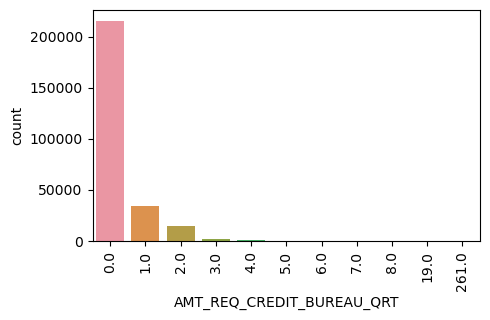

####################################################################################################


In [34]:
# Fill the missing AMT_REQ_CREDIT_BUREAU_QRT values with mode (0)
cat_summary(df, 'AMT_REQ_CREDIT_BUREAU_QRT', True)
df.loc[df['AMT_REQ_CREDIT_BUREAU_QRT'].isnull(), 'AMT_REQ_CREDIT_BUREAU_QRT'] = 0

In [35]:
df[df['AMT_REQ_CREDIT_BUREAU_QRT'] == 1]['TARGET'].value_counts()

0    31635
1     2227
Name: TARGET, dtype: int64

     AMT_REQ_CREDIT_BUREAU_WEEK  Ratio
0.0                      257456  83.72
1.0                        8208   2.67
2.0                         199   0.06
3.0                          58   0.02
4.0                          34   0.01
6.0                          20   0.01
5.0                          10   0.00
8.0                           5   0.00
7.0                           2   0.00


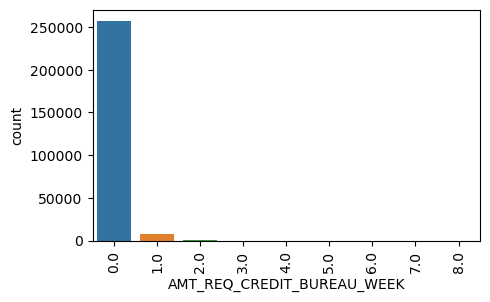

####################################################################################################


In [36]:
# Fill the missing AMT_REQ_CREDIT_BUREAU_WEEK values with mode (0)
cat_summary(df, 'AMT_REQ_CREDIT_BUREAU_WEEK', True)
df.loc[df['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull(), 'AMT_REQ_CREDIT_BUREAU_WEEK'] = 0

     AMT_REQ_CREDIT_BUREAU_WEEK  Ratio
0.0                      298975  97.22
1.0                        8208   2.67
2.0                         199   0.06
3.0                          58   0.02
4.0                          34   0.01
6.0                          20   0.01
5.0                          10   0.00
8.0                           5   0.00
7.0                           2   0.00


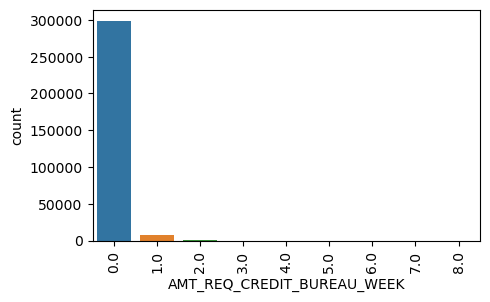

####################################################################################################


In [37]:
# Fill the missing AMT_REQ_CREDIT_BUREAU_WEEK values with mode (0)
cat_summary(df, 'AMT_REQ_CREDIT_BUREAU_WEEK', True)
df.loc[df['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull(), 'AMT_REQ_CREDIT_BUREAU_WEEK'] = 0

     AMT_REQ_CREDIT_BUREAU_HOUR  Ratio
0.0                      264366  85.97
1.0                        1560   0.51
2.0                          56   0.02
3.0                           9   0.00
4.0                           1   0.00


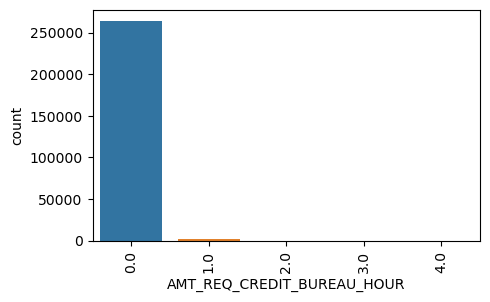

####################################################################################################


In [38]:
# Fill the missing AMT_REQ_CREDIT_BUREAU_HOUR values with mode (0)
cat_summary(df, 'AMT_REQ_CREDIT_BUREAU_HOUR', True)
df.loc[df['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull(), 'AMT_REQ_CREDIT_BUREAU_HOUR'] = 0

     AMT_REQ_CREDIT_BUREAU_MON  Ratio
0.0                     222233  72.27
1.0                      33147  10.78
2.0                       5386   1.75
2.5                       5226   1.70


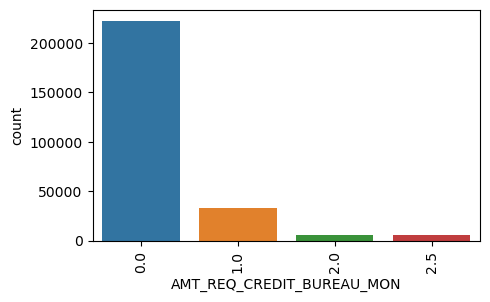

####################################################################################################


In [39]:
# Fill the missing AMT_REQ_CREDIT_BUREAU_MON values with mode (0)
cat_summary(df, 'AMT_REQ_CREDIT_BUREAU_MON', True)
df.loc[df['AMT_REQ_CREDIT_BUREAU_MON'].isnull(), 'AMT_REQ_CREDIT_BUREAU_MON'] = 0

     AMT_REQ_CREDIT_BUREAU_DAY  Ratio
0.0                     264503  86.01
1.0                       1292   0.42
2.0                        106   0.03
3.0                         45   0.01
4.0                         26   0.01
5.0                          9   0.00
6.0                          8   0.00
9.0                          2   0.00
8.0                          1   0.00


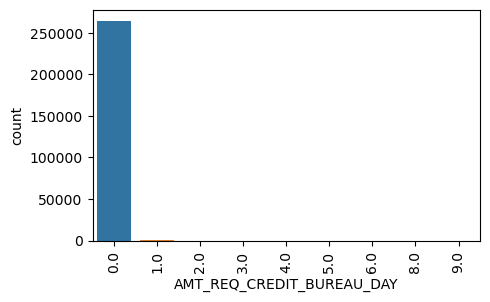

####################################################################################################


In [40]:
# Fill the missing AMT_REQ_CREDIT_BUREAU_DAY values with mode (0)
cat_summary(df, 'AMT_REQ_CREDIT_BUREAU_DAY', True)
df.loc[df['AMT_REQ_CREDIT_BUREAU_DAY'].isnull(), 'AMT_REQ_CREDIT_BUREAU_DAY'] = 0

      AMT_REQ_CREDIT_BUREAU_YEAR  Ratio
0.0                        71801  23.35
1.0                        63405  20.62
2.0                        50192  16.32
3.0                        33628  10.94
4.0                        20714   6.74
5.0                        12052   3.92
6.0                         6967   2.27
7.0                         3869   1.26
8.0                         2127   0.69
9.0                         1096   0.36
11.0                          31   0.01
12.0                          30   0.01
15.0                          29   0.01
10.0                          22   0.01
13.0                          19   0.01
14.0                          10   0.00


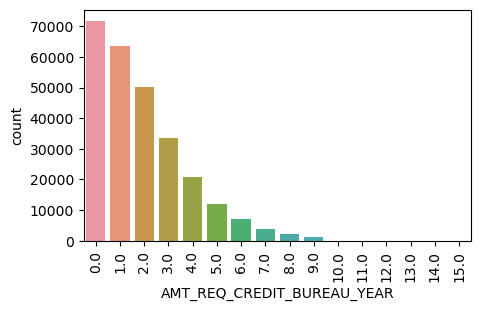

####################################################################################################


In [41]:
# Fill the missing AMT_REQ_CREDIT_BUREAU_YEAR values with mode (0). Actually we should fill missing values with KNN model.
# But now, lets continue with filling with mode.
cat_summary(df, 'AMT_REQ_CREDIT_BUREAU_YEAR', True)
df.loc[df['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull(), 'AMT_REQ_CREDIT_BUREAU_YEAR'] = 0

**Now I will delete all missing values that ratio of them is less than %1**

In [42]:
missing_value_table(df).reset_index()

,index,n_miss,ratio
0,NAME_TYPE_SUITE,1292,0.42
1,OBS_30_CNT_SOCIAL_CIRCLE,1021,0.33
2,DEF_30_CNT_SOCIAL_CIRCLE,1021,0.33
3,DEF_60_CNT_SOCIAL_CIRCLE,1021,0.33
4,EXT_SOURCE_2,660,0.21
5,AMT_ANNUITY,12,0.00
6,CNT_FAM_MEMBERS,2,0.00
7,DAYS_LAST_PHONE_CHANGE,1,0.00


In [43]:
df.dropna(inplace=True)

**Finally, I handle the all missing values. Let's continue with Encodings**

In [44]:
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,0,1,1,0,Laborers,1.0,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,0,1,1,0,Core staff,2.0,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.000000,1.0,0.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,0,Laborers,1.0,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,0,1,0,0,Laborers,2.0,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.000000,2.0,0.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,0,1,0,0,Core staff,1.0,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.000000,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


**But before going to encoding we need to reassign the categorical and numerical values**

In [45]:
cat_cols, num_cols, cat_but_car = grab_col_names(df, cat_th=20, car_th=20)

Observations: 304531
Variables: 68
Categorical Variables: 55
Numerical Variables: 12
Numerical But Categorical Variables: 44
Categorical But Cardinal: 1


### Encodings

**Binary Encoding**

In [46]:
# Catch the binary cols
binary_cols = [col for col in df.columns if ((df[col].dtype not in ['int64', 'float64']) and df[col].nunique() == 2)]
binary_cols

['NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']

In [47]:
for col in binary_cols:
    df = label_encoder(df, col)

In [48]:
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,0,M,0,1,0,202500.0,406597.5,24700.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,0,1,1,0,Laborers,1.0,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,F,0,0,0,270000.0,1293502.5,35698.5,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,0,1,1,0,Core staff,2.0,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.000000,1.0,0.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,M,1,1,0,67500.0,135000.0,6750.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,0,Laborers,1.0,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,F,0,1,0,135000.0,312682.5,29686.5,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,0,1,0,0,Laborers,2.0,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.000000,2.0,0.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,M,0,1,0,121500.0,513000.0,21865.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,0,1,0,0,Core staff,1.0,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.000000,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


**I forget the delete cardinal variables. So let's delete it**

In [49]:
df.drop('ORGANIZATION_TYPE', axis=1, inplace=True)

**Also we should the delete FLAG_DOCUMENT_12 and FLAG_DOCUMENT_10 because all values is same.**

In [50]:
df.drop(['FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_10'], axis=1, inplace=True)

**One Hot Encoding**

In [51]:
# Catch the one hot cols
one_hot_cols = [col for col in df.columns if  19 >= df[col].nunique() > 2]
one_hot_cols

['CODE_GENDER',
 'CNT_CHILDREN',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'WEEKDAY_APPR_PROCESS_START',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [52]:
df = one_hot_encoder(df, one_hot_cols, drop_first=True)

In [53]:
df.head()

,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,CODE_GENDER_M,CODE_GENDER_XNA,CNT_CHILDREN_1,CNT_CHILDREN_2,CNT_CHILDREN_3,CNT_CHILDREN_4,CNT_CHILDREN_5,CNT_CHILDREN_6,CNT_CHILDREN_7,CNT_CHILDREN_8,CNT_CHILDREN_9,CNT_CHILDREN_10,CNT_CHILDREN_11,CNT_CHILDREN_12,CNT_CHILDREN_14,CNT_CHILDREN_19,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_No Occupation,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,CNT_FAM_MEMBERS_2.0,CNT_FAM_MEMBERS_3.0,CNT_FAM_MEMBERS_4.0,CNT_FAM_MEMBERS_5.0,CNT_FAM_MEMBERS_6.0,CNT_FAM_MEMBERS_7.0,CNT_FAM_MEMBERS_8.0,CNT_FAM_MEMBERS_9.0,CNT_FAM_MEMBERS_10.0,CNT_FAM_MEMBERS_11.0,CNT_FAM_MEMBERS_12.0,CNT_FAM_MEMBERS_13.0,CNT_FAM_MEMBERS_14.0,CNT_FAM_MEMBERS_15.0,CNT_FAM_MEMBERS_16.0,CNT_FAM_MEMBERS_20.0,REGION_RATING_CLIENT_2,REGION_RATING_CLIENT_3,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,OBS_30_CNT_SOCIAL_CIRCLE_1.0,OBS_30_CNT_SOCIAL_CIRCLE_2.0,OBS_30_CNT_SOCIAL_CIRCLE_3.0,OBS_30_CNT_SOCIAL_CIRCLE_4.0,OBS_30_CNT_SOCIAL_CIRCLE_5.0,OBS_30_CNT_SOCIAL_CIRCLE_6.0,OBS_30_CNT_SOCIAL_CIRCLE_7.0,OBS_30_CNT_SOCIAL_CIRCLE_8.0,OBS_30_CNT_SOCIAL_CIRCLE_9.0,OBS_30_CNT_SOCIAL_CIRCLE_10.0,OBS_30_CNT_SOCIAL_CIRCLE_11.0,OBS_30_CNT_SOCIAL_CIRCLE_12.0,OBS_30_CNT_SOCIAL_CIRCLE_13.0,OBS_30_CNT_SOCIAL_CIRCLE_14.0,OBS_30_CNT_SOCIAL_CIRCLE_15.0,DEF_30_CNT_SOCIAL_CIRCLE_1.0,DEF_30_CNT_SOCIAL_CIRCLE_2.0,DEF_30_CNT_SOCIAL_CIRCLE_3.0,DEF_30_CNT_SOCIAL_CIRCLE_4.0,DEF_30_CNT_SOCIAL_CIRCLE_5.0,DEF_30_CNT_SOCIAL_CIRCLE_6.0,DEF_30_CNT_SOCIAL_CIRCLE_7.0,DEF_30_CNT_SOCIAL_CIRCLE_8.0,DEF_30_CNT_SOCIAL_CIRCLE_34.0,DEF_60_CNT_SOCIAL_CIRCLE_1.0,DEF_60_CNT_SOCIAL_CIRCLE_2.0,DEF_60_CNT_SOCIAL_CIRCLE_3.0,DEF_60_CNT_SOCIAL_CIRCLE_4.0,DEF_60_CNT_SOCIAL_CIRCLE_5.0,DEF_60_CNT_SOCIAL_CIRCLE_6.0,DEF_60_CNT_SOCIAL_CIRCLE_7.0,DEF_60_CNT_SOCIAL_CIRCLE_24.0,AMT_REQ_CREDIT_BUREAU_HOUR_1.0,AMT_REQ_CREDIT_BUREAU_HOUR_2.0,AMT_REQ_CREDIT_BUREAU_HOUR_3.0,

### Scaling

**We created many colums with encoding that's why need to reassing categorical and numerical columns**

In [54]:
cat_cols, num_cols, cat_but_car = grab_col_names(df, cat_th=20, car_th=20)

Observations: 304531
Variables: 209
Categorical Variables: 197
Numerical Variables: 12
Numerical But Categorical Variables: 197
Categorical But Cardinal: 0


In [55]:
df[num_cols]

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE
0,202500.0,406597.5,24700.5,0.018801,-9461,-637,-3648.0,-2120,10,0.262949,0.139376,-1134.0
1,270000.0,1293502.5,35698.5,0.003541,-16765,-1188,-1186.0,-291,11,0.622246,0.000000,-828.0
2,67500.0,135000.0,6750.0,0.010032,-19046,-225,-4260.0,-2531,9,0.555912,0.729567,-815.0
3,135000.0,312682.5,29686.5,0.008019,-19005,-3039,-9833.0,-2437,17,0.650442,0.000000,-617.0
4,121500.0,513000.0,21865.5,0.028663,-19932,-3038,-4311.0,-3458,11,0.322738,0.000000,-1106.0
...,...,...,...,...,...,...,...,...,...,...,...,...
307506,157500.0,254700.0,27558.0,0.032561,-9327,-236,-8456.0,-1982,15,0.681632,0.000000,-273.0
307507,72000.0,269550.0,12001.5,0.025164,-20775,365243,-4388.0,-4090,8,0.115992,0.000000,0.0
307508,153000.0,677664.0,29979.0,0.005002,-14966,-7921,-6737.0,-5150,9,0.535722,0.218859,-1909.0
307509,171000.0,370107.0,20205.0,0.005313,-11961,-4786,-2562.0,-931,9,0.514163,0.661024,-322.0


In [56]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
AMT_INCOME_TOTAL,304531.0,167380.511299,89708.477520,2.565000e+04,112500.000000,147600.000000,202500.000000,7.425000e+05
AMT_CREDIT,304531.0,599520.787875,401862.059205,4.500000e+04,270000.000000,517266.000000,808650.000000,3.172500e+06
AMT_ANNUITY,304531.0,27124.818372,14286.141347,1.615500e+03,16573.500000,24939.000000,34641.000000,1.198125e+05
REGION_POPULATION_RELATIVE,304531.0,0.020842,0.013808,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,304531.0,-16040.509915,4361.978717,-2.522900e+04,-19682.000000,-15755.000000,-12418.000000,-7.489000e+03
DAYS_EMPLOYED,304531.0,63831.232423,141291.148422,-1.791200e+04,-2762.000000,-1215.000000,-290.000000,3.652430e+05
DAYS_REGISTRATION,304531.0,-4986.687785,3521.601095,-2.467200e+04,-7478.000000,-4505.000000,-2012.000000,0.000000e+00
DAYS_ID_PUBLISH,304531.0,-2994.732070,1509.373915,-7.197000e+03,-4299.000000,-3255.000000,-1721.000000,0.000000e+00
HOUR_APPR_PROCESS_START,304531.0,12.060079,3.265884,0.000000e+00,10.000000,12.000000,14.000000,2.300000e+01
EXT_SOURCE_2,304531.0,0.514220,0.191125,8.173617e-08,0.392108,0.565811,0.663546,8.549997e-01


In [57]:
rs = RobustScaler()

In [58]:
scale_columns = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'HOUR_APPR_PROCESS_START',
       'DAYS_LAST_PHONE_CHANGE']

In [59]:
for col in scale_columns:
    df[col] = rs.fit_transform(df[[col]])

In [60]:
df[num_cols].head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE
0,0.61,-0.205455,-0.013200,0.018801,0.866465,0.233819,0.156787,0.440264,-0.50,0.262949,0.139376,-0.287809
1,1.36,1.441078,0.595517,0.003541,-0.139042,0.010922,0.607208,1.149728,-0.25,0.622246,0.000000,-0.051698
2,-0.89,-0.709674,-1.006725,0.010032,-0.453056,0.400485,0.044823,0.280838,-0.75,0.555912,0.729567,-0.041667
3,-0.14,-0.379808,0.262765,0.008019,-0.447412,-0.737864,-0.974753,0.317300,1.25,0.650442,0.000000,0.111111
4,-0.29,-0.007920,-0.170112,0.028663,-0.575028,-0.737460,0.035492,-0.078743,-0.25,0.322738,0.000000,-0.266204


**We completed all feature engineering process. Everthing is ready for modelling**

## Modelling

**Define the features and label**

In [61]:
X = df.drop('TARGET', axis=1)
y = df['TARGET']

In [62]:
y.value_counts() 

0    279864
1     24667
Name: TARGET, dtype: int64

**Our data is not balanced so I will do oversampling** 

In [63]:
oversample = SMOTE()
X_oversampled, y_oversampled = oversample.fit_resample(X, y)

In [64]:
y_oversampled.value_counts()

1    279864
0    279864
Name: TARGET, dtype: int64

**Our data is nearly 600.000. It is too big for modeling and hyperparameter tuning. That's why let's get 30.000 random sampling**

In [65]:
sample_size = 30000
indices = np.random.choice(len(X_oversampled), size=sample_size, replace=False)

In [66]:
X_sampled = X_oversampled[X_oversampled.index.isin(indices)]
y_sampled = y_oversampled[y_oversampled.index.isin(indices)]

In [67]:
X_sampled.head()

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,CODE_GENDER_M,CODE_GENDER_XNA,CNT_CHILDREN_1,CNT_CHILDREN_2,CNT_CHILDREN_3,CNT_CHILDREN_4,CNT_CHILDREN_5,CNT_CHILDREN_6,CNT_CHILDREN_7,CNT_CHILDREN_8,CNT_CHILDREN_9,CNT_CHILDREN_10,CNT_CHILDREN_11,CNT_CHILDREN_12,CNT_CHILDREN_14,CNT_CHILDREN_19,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_No Occupation,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,CNT_FAM_MEMBERS_2.0,CNT_FAM_MEMBERS_3.0,CNT_FAM_MEMBERS_4.0,CNT_FAM_MEMBERS_5.0,CNT_FAM_MEMBERS_6.0,CNT_FAM_MEMBERS_7.0,CNT_FAM_MEMBERS_8.0,CNT_FAM_MEMBERS_9.0,CNT_FAM_MEMBERS_10.0,CNT_FAM_MEMBERS_11.0,CNT_FAM_MEMBERS_12.0,CNT_FAM_MEMBERS_13.0,CNT_FAM_MEMBERS_14.0,CNT_FAM_MEMBERS_15.0,CNT_FAM_MEMBERS_16.0,CNT_FAM_MEMBERS_20.0,REGION_RATING_CLIENT_2,REGION_RATING_CLIENT_3,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,OBS_30_CNT_SOCIAL_CIRCLE_1.0,OBS_30_CNT_SOCIAL_CIRCLE_2.0,OBS_30_CNT_SOCIAL_CIRCLE_3.0,OBS_30_CNT_SOCIAL_CIRCLE_4.0,OBS_30_CNT_SOCIAL_CIRCLE_5.0,OBS_30_CNT_SOCIAL_CIRCLE_6.0,OBS_30_CNT_SOCIAL_CIRCLE_7.0,OBS_30_CNT_SOCIAL_CIRCLE_8.0,OBS_30_CNT_SOCIAL_CIRCLE_9.0,OBS_30_CNT_SOCIAL_CIRCLE_10.0,OBS_30_CNT_SOCIAL_CIRCLE_11.0,OBS_30_CNT_SOCIAL_CIRCLE_12.0,OBS_30_CNT_SOCIAL_CIRCLE_13.0,OBS_30_CNT_SOCIAL_CIRCLE_14.0,OBS_30_CNT_SOCIAL_CIRCLE_15.0,DEF_30_CNT_SOCIAL_CIRCLE_1.0,DEF_30_CNT_SOCIAL_CIRCLE_2.0,DEF_30_CNT_SOCIAL_CIRCLE_3.0,DEF_30_CNT_SOCIAL_CIRCLE_4.0,DEF_30_CNT_SOCIAL_CIRCLE_5.0,DEF_30_CNT_SOCIAL_CIRCLE_6.0,DEF_30_CNT_SOCIAL_CIRCLE_7.0,DEF_30_CNT_SOCIAL_CIRCLE_8.0,DEF_30_CNT_SOCIAL_CIRCLE_34.0,DEF_60_CNT_SOCIAL_CIRCLE_1.0,DEF_60_CNT_SOCIAL_CIRCLE_2.0,DEF_60_CNT_SOCIAL_CIRCLE_3.0,DEF_60_CNT_SOCIAL_CIRCLE_4.0,DEF_60_CNT_SOCIAL_CIRCLE_5.0,DEF_60_CNT_SOCIAL_CIRCLE_6.0,DEF_60_CNT_SOCIAL_CIRCLE_7.0,DEF_60_CNT_SOCIAL_CIRCLE_24.0,AMT_REQ_CREDIT_BUREAU_HOUR_1.0,AMT_REQ_CREDIT_BUREAU_HOUR_2.0,AMT_REQ_CREDIT_BUREAU_HOUR_3.0,AMT_REQ

In [68]:
y_sampled.head()

8     0
16    0
38    0
60    0
77    0
Name: TARGET, dtype: int64

**It looks very nice.. Let's modelling our data with different models..**

### Base Model

In [69]:
# Deleting special characters in the columns because LightGBM doesn't accept that.
X_sampled.columns = [re.sub(r'[^\w\s]', '', i) for i in X_sampled.columns]

In [70]:
base_models(X_sampled, y_sampled)

Base Models....
roc_auc: 0.9244 (LR)
roc_auc: 0.7559 (KNN)
roc_auc: 0.7227 (CART)
roc_auc: 0.9271 (RF)
roc_auc: 0.9299 (GBM)
roc_auc: 0.9647 (XGBoost)
roc_auc: 0.9639 (LightGBM)
roc_auc: 0.9638 (CatBoost)
################################################## 

f1: 0.8491 (LR)
f1: 0.7005 (KNN)
f1: 0.7242 (CART)
f1: 0.8438 (RF)
f1: 0.8472 (GBM)
f1: 0.9214 (XGBoost)
f1: 0.9246 (LightGBM)
f1: 0.9241 (CatBoost)
################################################## 

precision: 0.8597 (LR)
precision: 0.5456 (KNN)
precision: 0.7122 (CART)
precision: 0.8635 (RF)
precision: 0.8552 (GBM)
precision: 0.9652 (XGBoost)
precision: 0.9796 (LightGBM)
precision: 0.9735 (CatBoost)
################################################## 

recall: 0.8493 (LR)
recall: 0.9783 (KNN)
recall: 0.7383 (CART)
recall: 0.8281 (RF)
recall: 0.8478 (GBM)
recall: 0.9018 (XGBoost)
recall: 0.8953 (LightGBM)
recall: 0.8999 (CatBoost)
################################################## 

accuracy: 0.8585 (LR)
accuracy: 0.587 (KNN)
accu

### Final Model and Hyperparameter Tuning

In [76]:
lightgbm_params = {"learning_rate": [0.005, 0.01, 0.03, 0.1, 0.2],
               "n_estimators": [500, 1000, 5000, 7000],
               "colsample_bytree": [0.5, 0.7, 0.8]}

xgboost_params = {"learning_rate": [0.005, 0.01, 0.03, 0.1, 0.2],
                  "max_depth": [3, 4, 5, 6, 8],
                  "n_estimators": [500, 1000, 5000]}

In [77]:
classifiers = [('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss'), xgboost_params),
               ('LightGBM', LGBMClassifier(), lightgbm_params)]

In [ ]:
best_model_recall = hyperparam eter_optimization(X_sampled, y_sampled, cv=5, scoring="recall")

Hyperparameter Optimization....
########## XGBoost ##########
recall (Before): 0.9018
